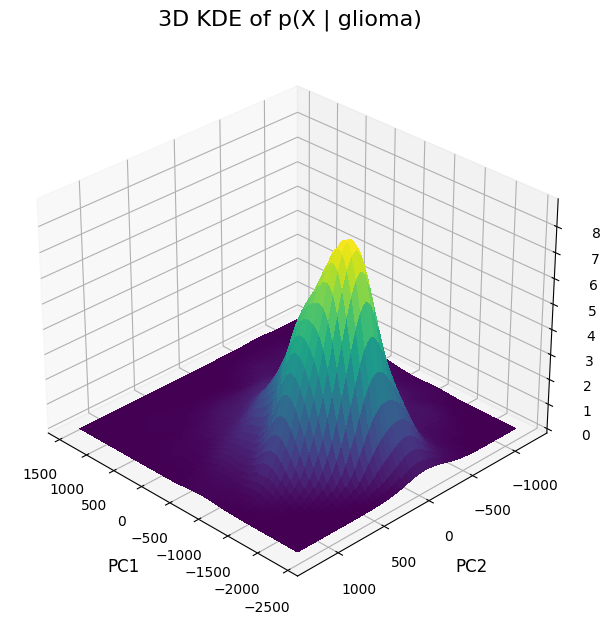

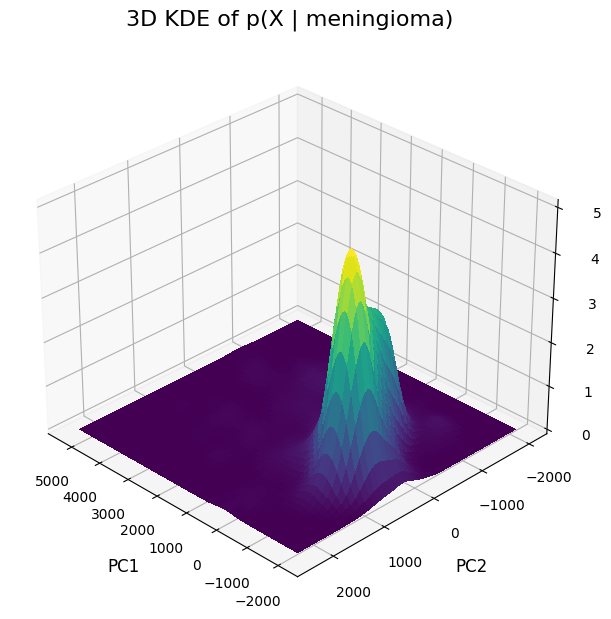

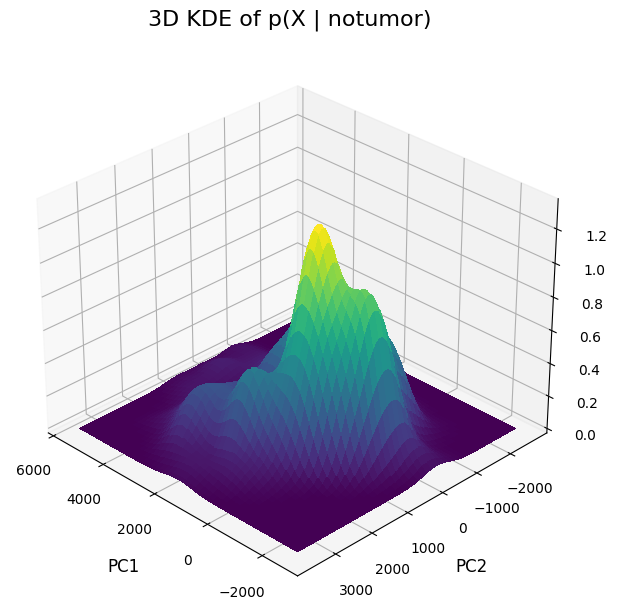

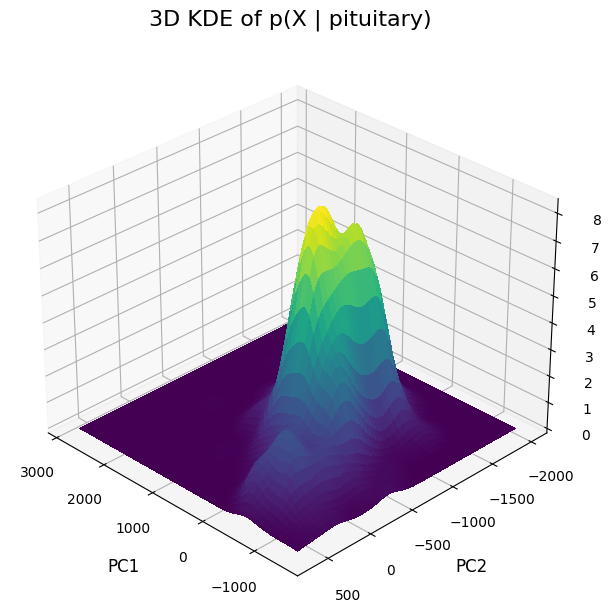

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Path to dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Sorted class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Collect features and labels
features = []
labels = []

# Resize images, flatten, and collect features per class
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# Plot each class KDE surface individually
for cls in classes:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    class_points = X_2D[labels == cls]
    
    # 2D KDE estimation
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    
    # Grid for density estimation
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

    # Plot the KDE surface
    ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='viridis', linewidth=0, antialiased=False)

    # Titles and labels
    ax.set_title(f"3D KDE of p(X | {cls})", fontsize=16, pad=15)
    ax.set_xlabel('PC1', fontsize=12, labelpad=15)  # increase labelpad for more space
    ax.set_ylabel('PC2', fontsize=12, labelpad=15)
    ax.set_zlabel('Density', fontsize=12, labelpad=15)
    
    ax.tick_params(axis='x', labelsize=10, pad=8)  # add padding to tick labels
    ax.tick_params(axis='y', labelsize=10, pad=8)
    ax.tick_params(axis='z', labelsize=10, pad=8)
    
    # Adjust view angle for better visualization
    ax.view_init(elev=30, azim=135)

    # Adjust subplot to prevent clipping left labels and center figure
    plt.subplots_adjust(left=0.2, right=0.85, top=0.9, bottom=0.1)
    
    plt.show()


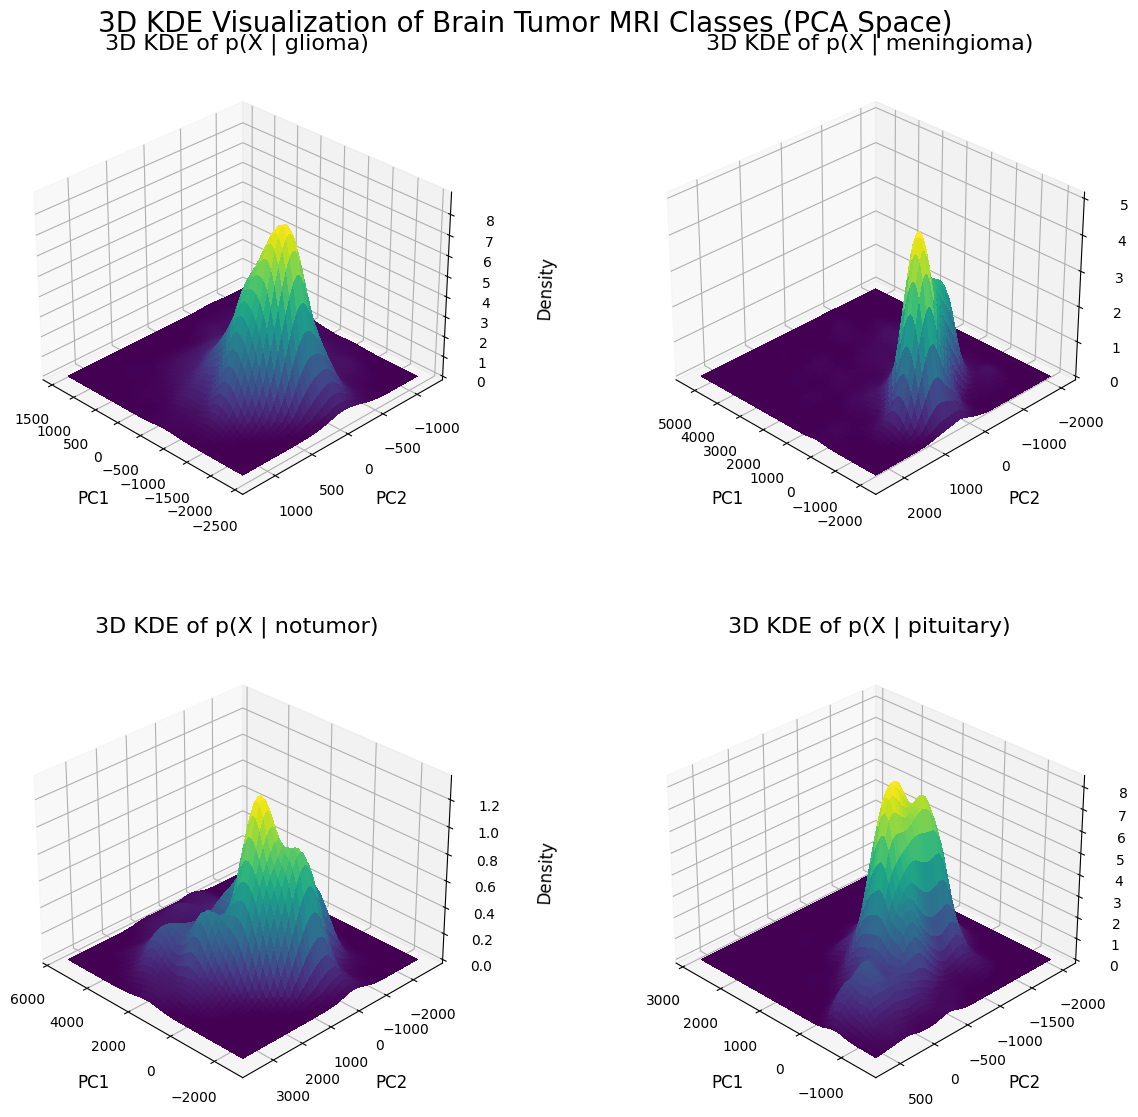

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Path to dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Sorted class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Collect features and labels
features = []
labels = []

# Resize images, flatten, and collect features per class
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# Create a 2x2 subplot grid for the 4 classes
fig = plt.figure(figsize=(14, 12))

for i, cls in enumerate(classes):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')

    class_points = X_2D[labels == cls]

    # 2D KDE estimation
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)

    # Grid for density estimation
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

    # Plot the KDE surface
    ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='viridis', linewidth=0, antialiased=False)

    # Titles and labels with padding
    ax.set_title(f"3D KDE of p(X | {cls})", fontsize=16, pad=15)
    ax.set_xlabel('PC1', fontsize=12, labelpad=15)
    ax.set_ylabel('PC2', fontsize=12, labelpad=15)
    ax.set_zlabel('Density', fontsize=12, labelpad=20)

    ax.tick_params(axis='x', labelsize=10, pad=8)
    ax.tick_params(axis='y', labelsize=10, pad=8)
    ax.tick_params(axis='z', labelsize=10, pad=8)

    # Adjust view angle for better visualization
    ax.view_init(elev=30, azim=135)

# Adjust spacing so labels are not cut off and layout looks balanced
plt.subplots_adjust(left=0.12, right=0.92, top=0.93, bottom=0.07, wspace=0.3, hspace=0.3)
plt.suptitle("3D KDE Visualization of Brain Tumor MRI Classes (PCA Space)\n", fontsize=20, y=0.98)

plt.show()


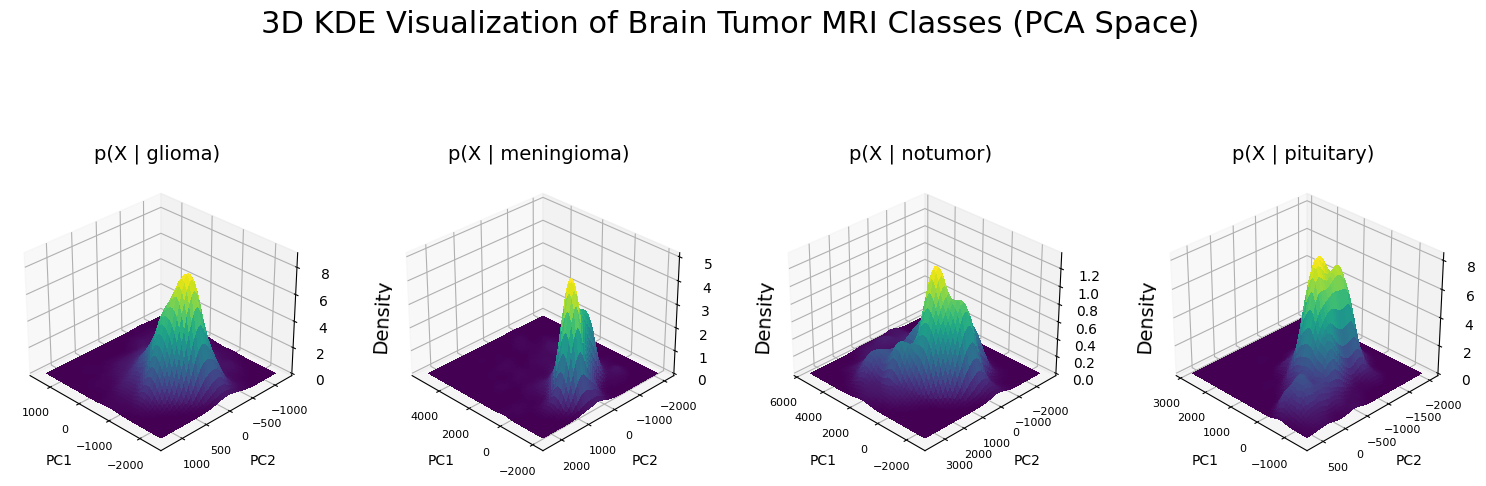

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Path to dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Sorted class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Collect features and labels
features = []
labels = []

# Resize images, flatten, and collect features per class
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# KDE Surface plot per class with reduced figure size (80%)
fig = plt.figure(figsize=(16, 6.4))  # 80% of original size (20,8)

for i, cls in enumerate(classes):
    ax = fig.add_subplot(1, len(classes), i + 1, projection='3d')
    class_points = X_2D[labels == cls]
    
    # 2D KDE estimation
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    
    # Grid for density estimation
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

    # Plot the KDE surface
    ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='viridis', linewidth=0, antialiased=False)

    # Improve z-axis label visibility
    ax.set_title(f"p(X | {cls})", fontsize=14, pad=10)
    ax.set_xlabel('PC1', fontsize=10, labelpad=6)
    ax.set_ylabel('PC2', fontsize=10, labelpad=6)

    ax.set_zlabel('Density', fontsize=14, labelpad=15)  # Larger font and padding
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=10)  # Slightly bigger z tick labels

    # Adjust view angle for better z label visibility
    ax.view_init(elev=30, azim=135)

# Increase horizontal spacing to avoid subplot overlap
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

plt.suptitle("3D KDE Visualization of Brain Tumor MRI Classes (PCA Space)", fontsize=22)
plt.show()


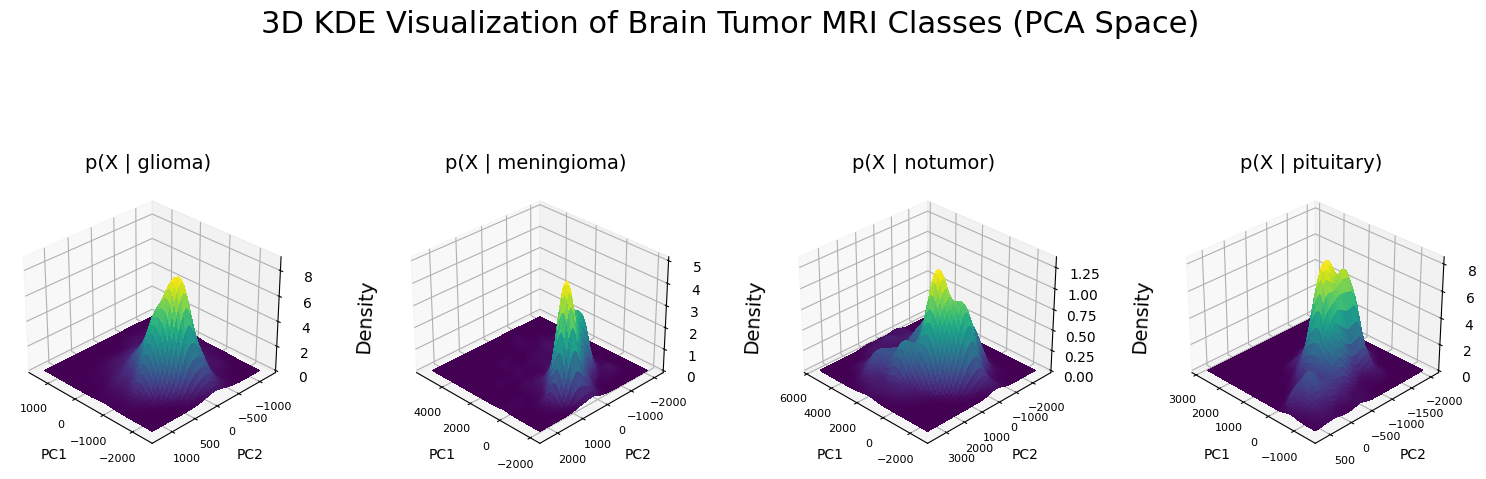

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Path to dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Sorted class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Collect features and labels
features = []
labels = []

# Resize images, flatten, and collect features per class
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# KDE Surface plot per class with reduced figure size (80%)
fig = plt.figure(figsize=(16, 6.4))  # 80% of original size (20,8)

for i, cls in enumerate(classes):
    ax = fig.add_subplot(1, len(classes), i + 1, projection='3d')
    class_points = X_2D[labels == cls]
    
    # 2D KDE estimation
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    
    # Grid for density estimation
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

    # Plot the KDE surface
    ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='viridis', linewidth=0, antialiased=False)

    # Improve z-axis label visibility
    ax.set_title(f"p(X | {cls})", fontsize=14, pad=10)
    ax.set_xlabel('PC1', fontsize=10, labelpad=6)
    ax.set_ylabel('PC2', fontsize=10, labelpad=6)

    ax.set_zlabel('Density', fontsize=14, labelpad=15)  # Larger font and padding
    ax.zaxis.label.set_visible(True)  # Force z-axis label visibility
    
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=10)  # Slightly bigger z tick labels

    # Adjust view angle for better z label visibility
    ax.view_init(elev=30, azim=135)

# Increase horizontal spacing to avoid subplot overlap
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.4)
plt.suptitle("3D KDE Visualization of Brain Tumor MRI Classes (PCA Space)", fontsize=22)
plt.show()


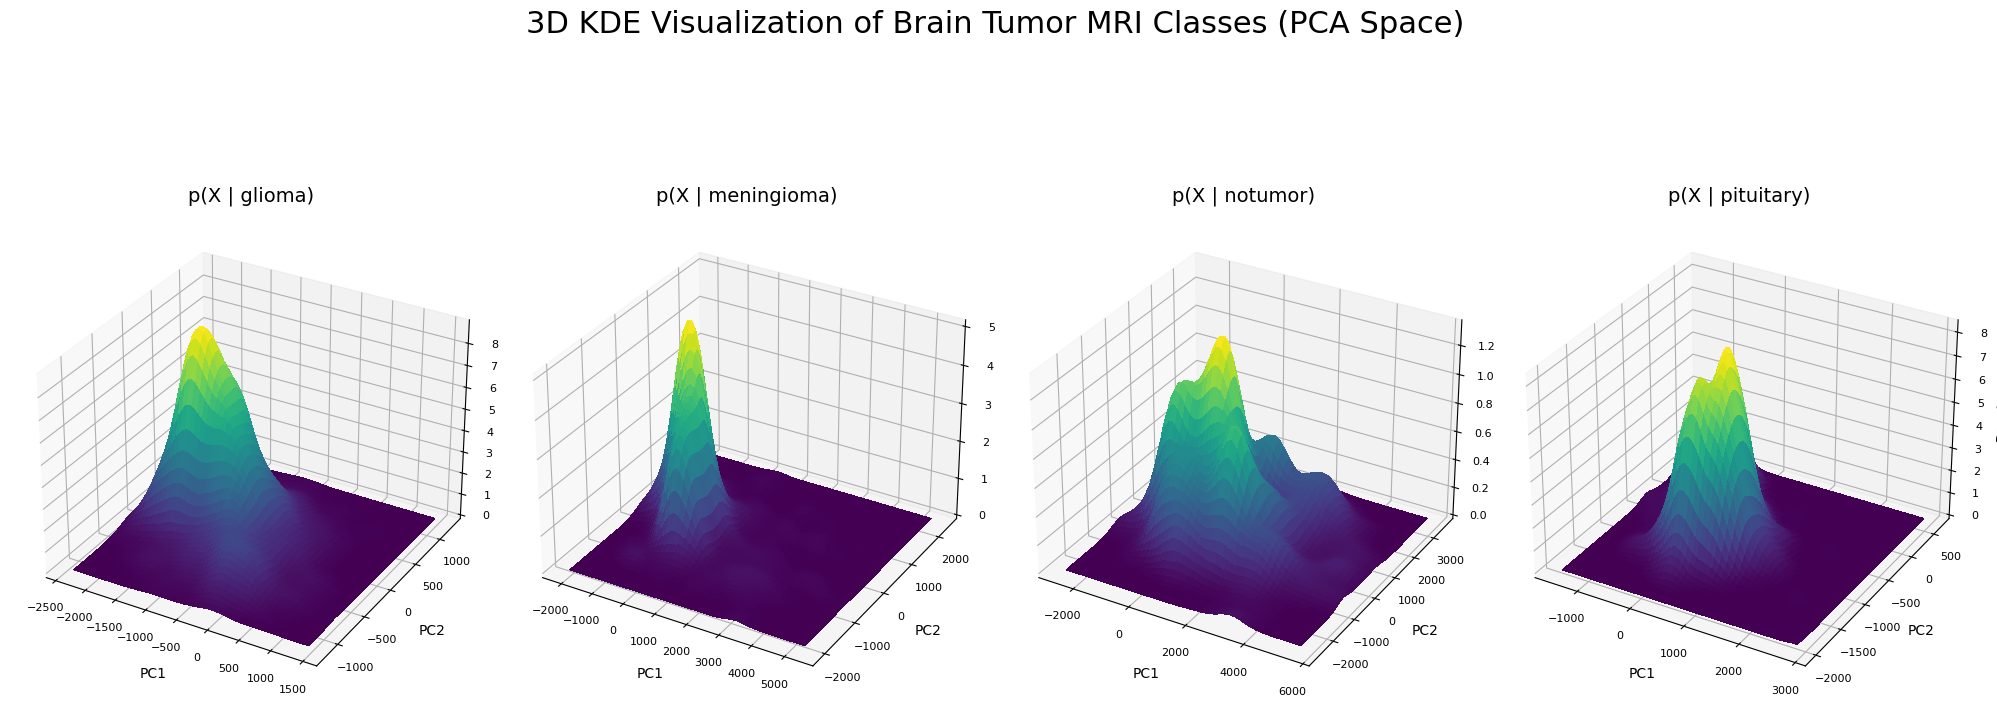

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Path to dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Sorted class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Collect features and labels
features = []
labels = []

# Resize images, flatten, and collect features per class
for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# KDE Surface plot per class
fig = plt.figure(figsize=(20, 8))

for i, cls in enumerate(classes):
    ax = fig.add_subplot(1, len(classes), i + 1, projection='3d')
    class_points = X_2D[labels == cls]
    
    # 2D KDE estimation
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)
    
    # Grid for density estimation
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()]))

    # Plot the KDE surface
    ax.plot_surface(xi, yi, zi.reshape(xi.shape), cmap='viridis', linewidth=0, antialiased=False)
    
    # Smaller font sizes for clarity
    ax.set_title(f"p(X | {cls})", fontsize=14, pad=10)
    ax.set_xlabel('PC1', fontsize=10, labelpad=6)
    ax.set_ylabel('PC2', fontsize=10, labelpad=6)
    ax.set_zlabel('Density', fontsize=10, labelpad=1)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='z', labelsize=8)

plt.suptitle("3D KDE Visualization of Brain Tumor MRI Classes (PCA Space)", fontsize=22, y=1.03)
plt.tight_layout()
plt.show()


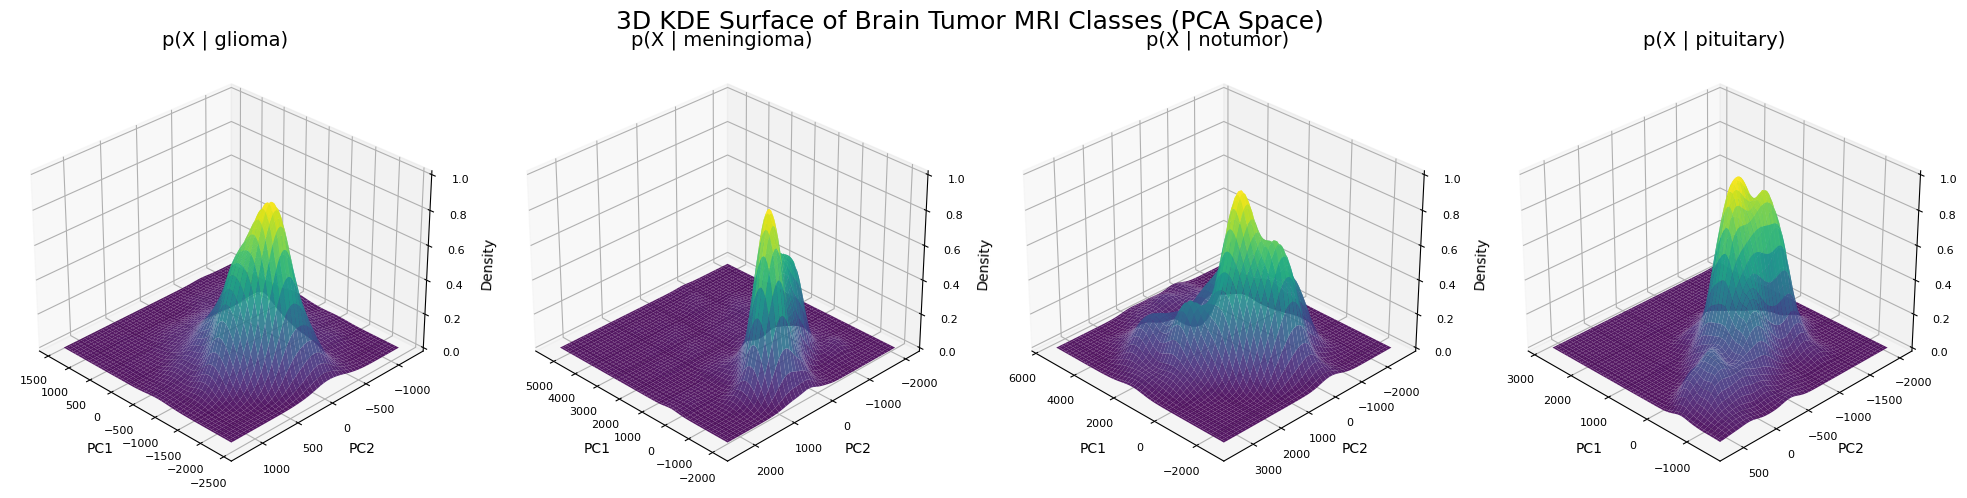

In [6]:
# KDE Surface Plot with Enhanced Density Visibility
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Class folders
classes = sorted([cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))])

# Load features and labels
features, labels = [], []

for cls in classes:
    cls_folder = os.path.join(data_path, cls)
    for file in sorted(os.listdir(cls_folder)):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(cls_folder, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (64, 64))
                features.append(img.flatten())
                labels.append(cls)

features = np.array(features)
labels = np.array(labels)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(features)

# KDE surface plot for each class
fig = plt.figure(figsize=(20, 5))

for i, cls in enumerate(classes):
    ax = fig.add_subplot(1, len(classes), i + 1, projection='3d')
    
    # Select class points
    class_points = X_2D[labels == cls]
    x, y = class_points[:, 0], class_points[:, 1]
    xy = np.vstack([x, y])

    # Perform KDE
    kde = gaussian_kde(xy, bw_method='scott')
    
    # Grid for KDE evaluation
    xi, yi = np.linspace(x.min()-1, x.max()+1, 100), np.linspace(y.min()-1, y.max()+1, 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

    # Normalize Z values for better visibility
    zi = zi / zi.max()

    # Plot surface
    surf = ax.plot_surface(xi, yi, zi, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)
    ax.set_title(f"p(X | {cls})", fontsize=14)
    ax.set_xlabel("PC1", fontsize=10)
    ax.set_ylabel("PC2", fontsize=10)
    ax.set_zlabel("Density", fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.view_init(elev=30, azim=135)

plt.suptitle("3D KDE Surface of Brain Tumor MRI Classes (PCA Space)", fontsize=18)
plt.tight_layout()
plt.show()


Processing pituitary: 100%|██████████| 1457/1457 [00:09<00:00, 155.15it/s]
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/2405988586.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_19/240598858

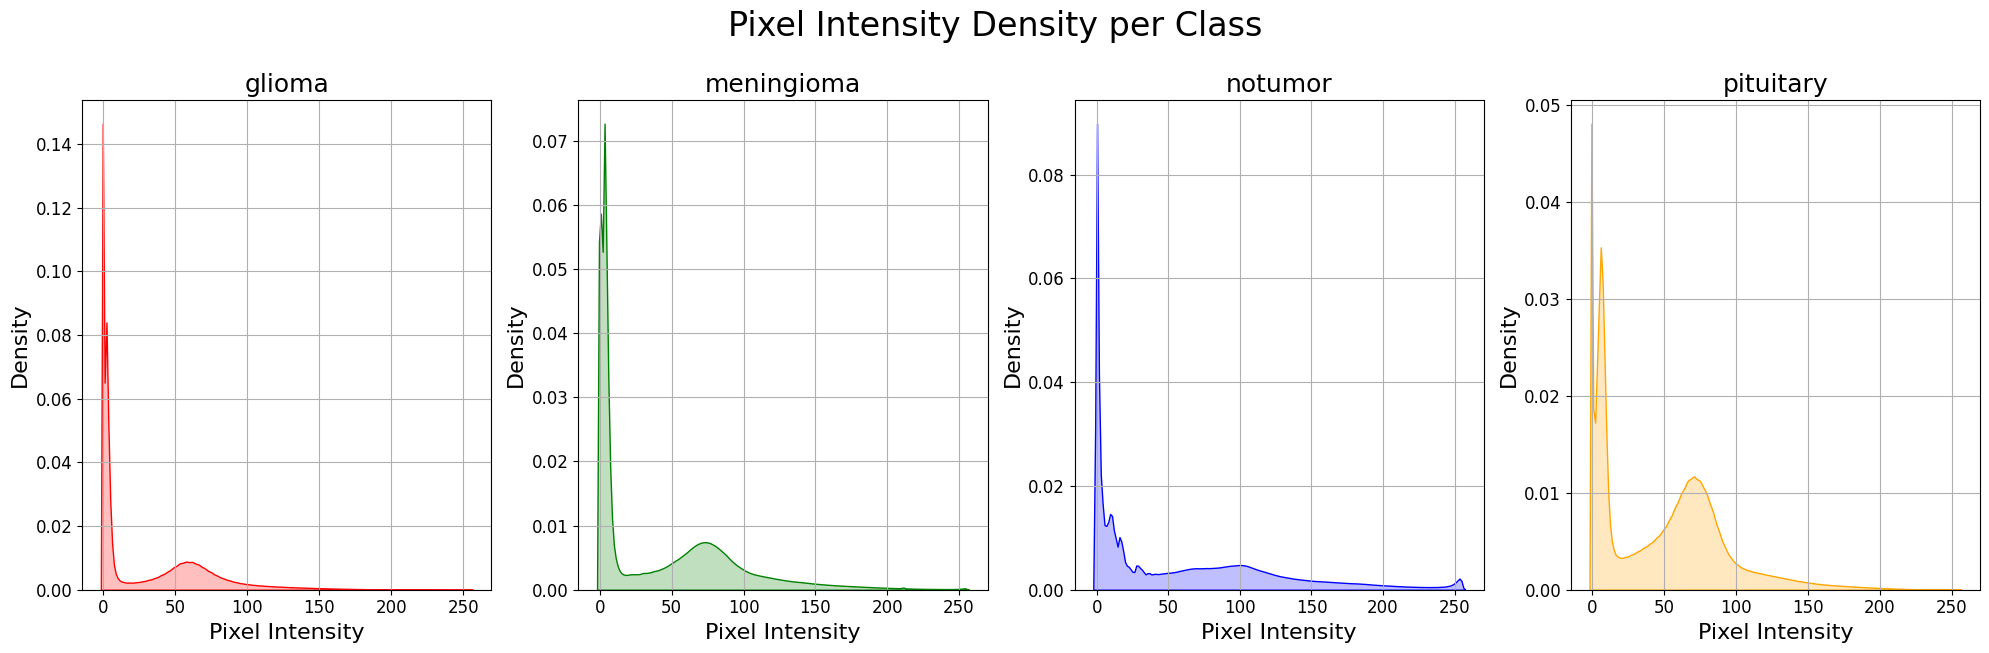

In [7]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Dataset path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Store pixel intensities per class
class_pixel_values = {}

# Read images and store pixel intensities by class (sorted folders)
for folder in sorted(os.listdir(data_path)):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_values = []
        for img_file in tqdm(sorted(os.listdir(folder_path)), desc=f'Processing {folder}'):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (256, 256))
                    pixel_values.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_values)

# Plot KDEs in a single row (4 subplots)
colors = ['red', 'green', 'blue', 'orange']
class_names = list(class_pixel_values.keys())

plt.figure(figsize=(20, 6))
for i, cls in enumerate(class_names):
    plt.subplot(1, 4, i + 1)
    sns.kdeplot(class_pixel_values[cls], bw_adjust=0.5, fill=True, color=colors[i % len(colors)])
    plt.title(f'{cls}', fontsize=18)
    plt.xlabel('Pixel Intensity', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.tight_layout()

plt.suptitle('Pixel Intensity Density per Class', fontsize=24, y=1.08)
plt.show()


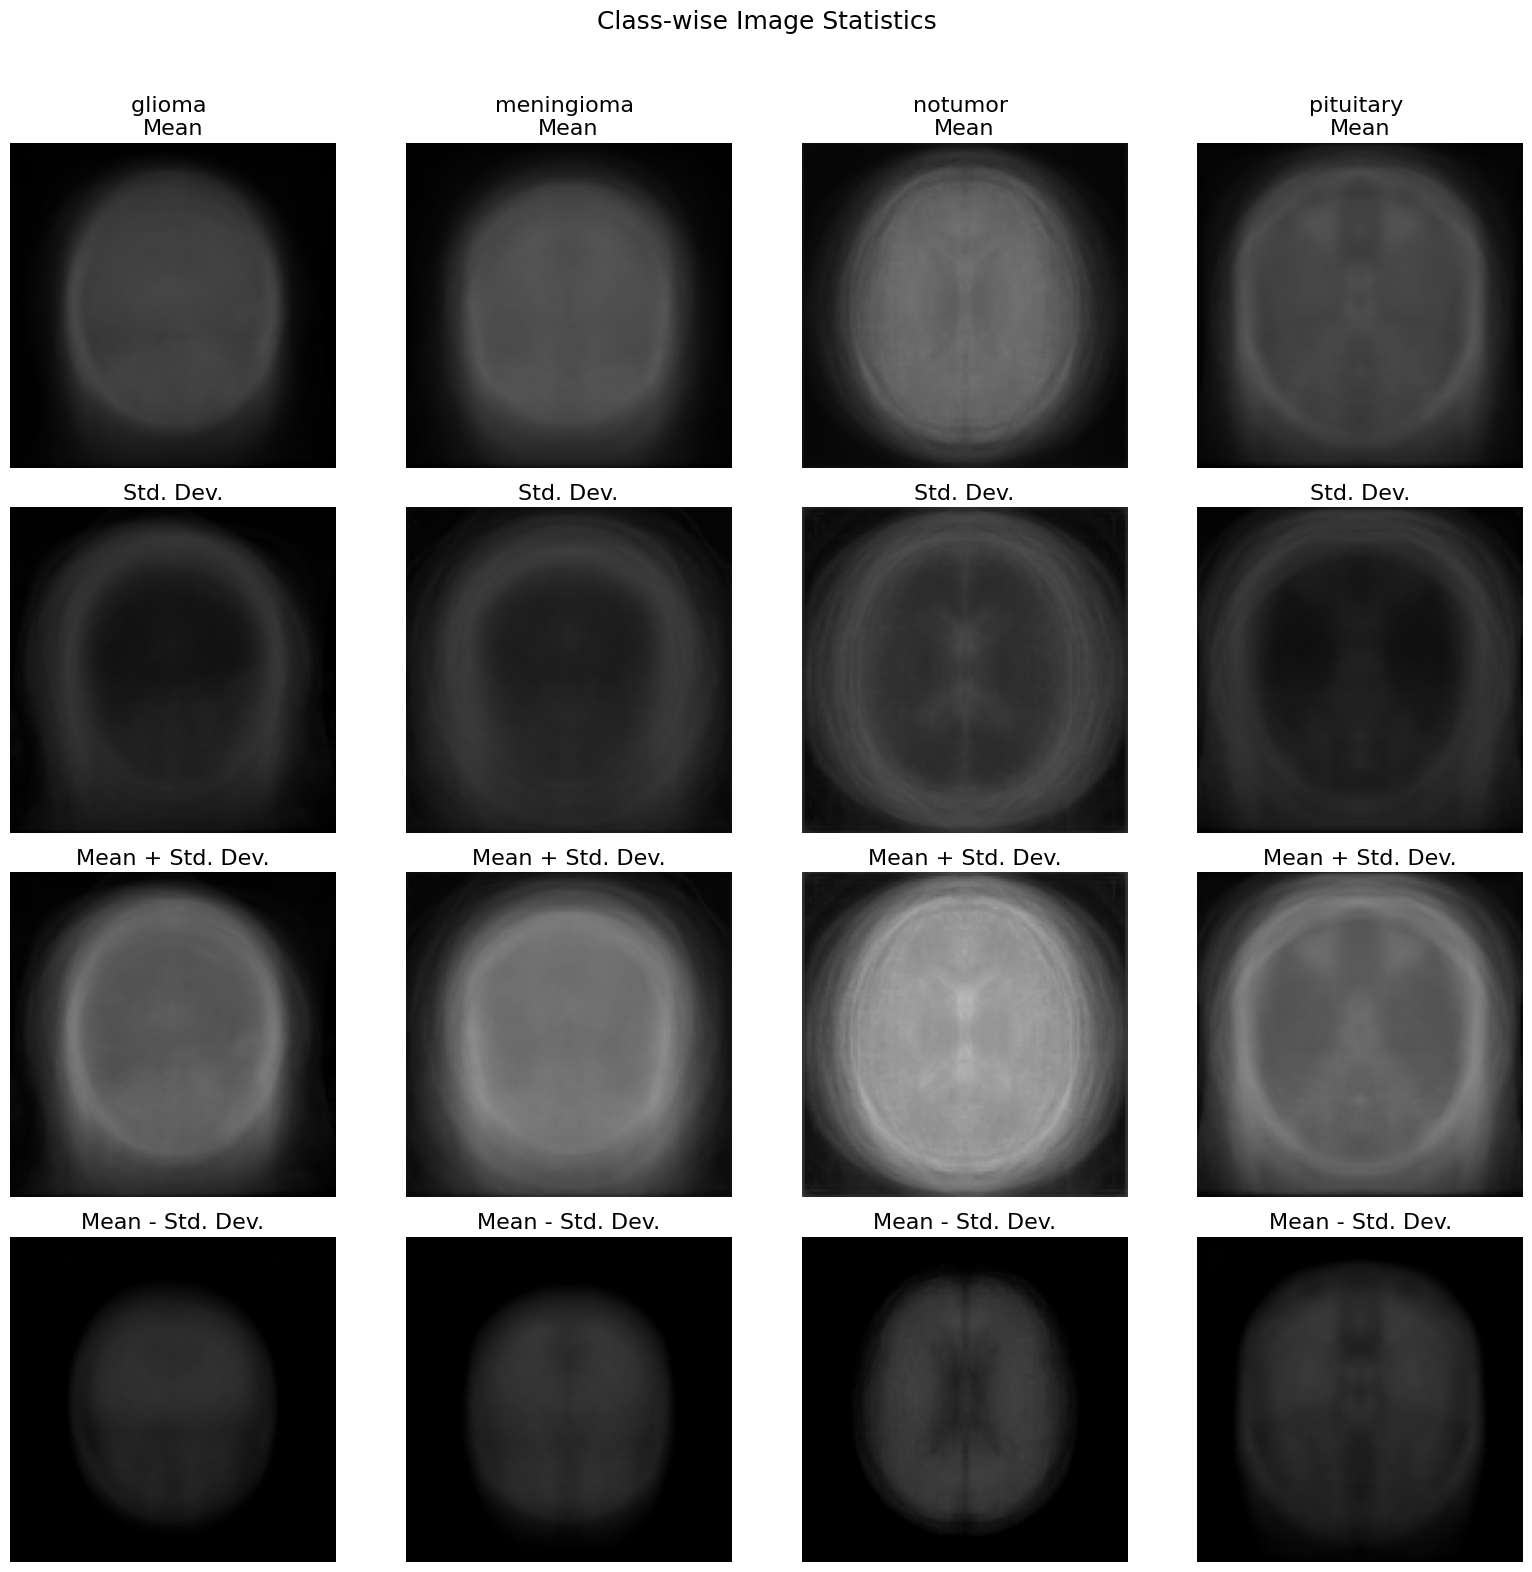

In [8]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the path
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Image size
IMG_SIZE = (128, 128)

# Get sorted class names
classes = sorted([d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))])

# Create subplot: 4 rows (mean, std, mean+std, mean-std) × number of classes
fig, axs = plt.subplots(4, len(classes), figsize=(4 * len(classes), 16))
fig.suptitle('Class-wise Image Statistics', fontsize=18)

# Function to compute mean and std
def compute_mean_std(image_list):
    images = np.stack(image_list, axis=0)
    mean_image = np.mean(images, axis=0)
    std_image = np.std(images, axis=0)
    return mean_image, std_image

# Loop over classes
for i, class_name in enumerate(classes):
    class_path = os.path.join(data_path, class_name)
    image_files = sorted([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    images = []
    for img_file in image_files:
        img = cv2.imread(os.path.join(class_path, img_file))
        img = cv2.resize(img, IMG_SIZE)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img / 255.0)  # Normalize

    if len(images) == 0:
        continue

    # Compute mean and std
    mean_img, std_img = compute_mean_std(images)
    pos_dev = np.clip(mean_img + std_img, 0, 1)
    neg_dev = np.clip(mean_img - std_img, 0, 1)

    # Plot mean (row 0)
    axs[0, i].imshow(mean_img)
    axs[0, i].set_title(f"{class_name} \nMean", fontsize=16)
    axs[0, i].axis('off')

    # Plot std dev (row 1)
    axs[1, i].imshow(std_img)
    axs[1, i].set_title("Std. Dev.", fontsize=16)
    axs[1, i].axis('off')

    # Plot mean + std (row 2)
    axs[2, i].imshow(pos_dev)
    axs[2, i].set_title("Mean + Std. Dev.", fontsize=16)
    axs[2, i].axis('off')

    # Plot mean - std (row 3)
    axs[3, i].imshow(neg_dev)
    axs[3, i].set_title("Mean - Std. Dev.", fontsize=16)
    axs[3, i].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


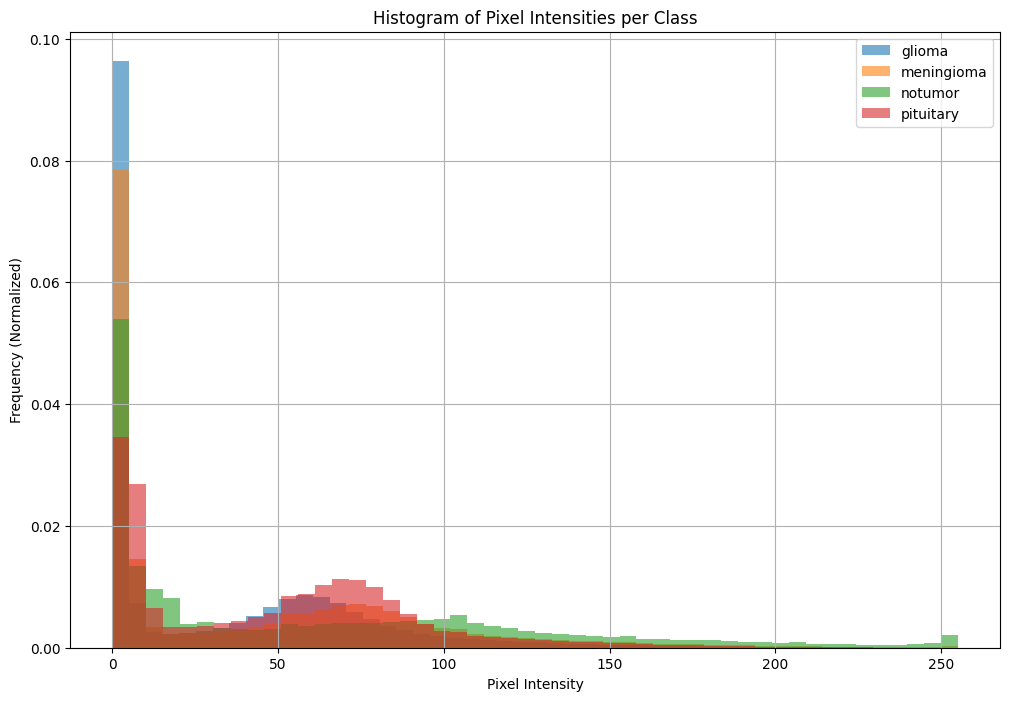

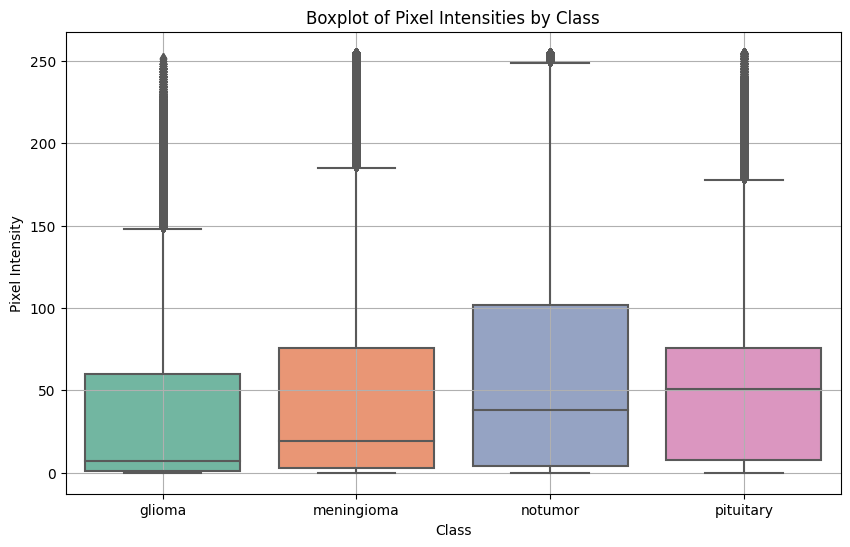

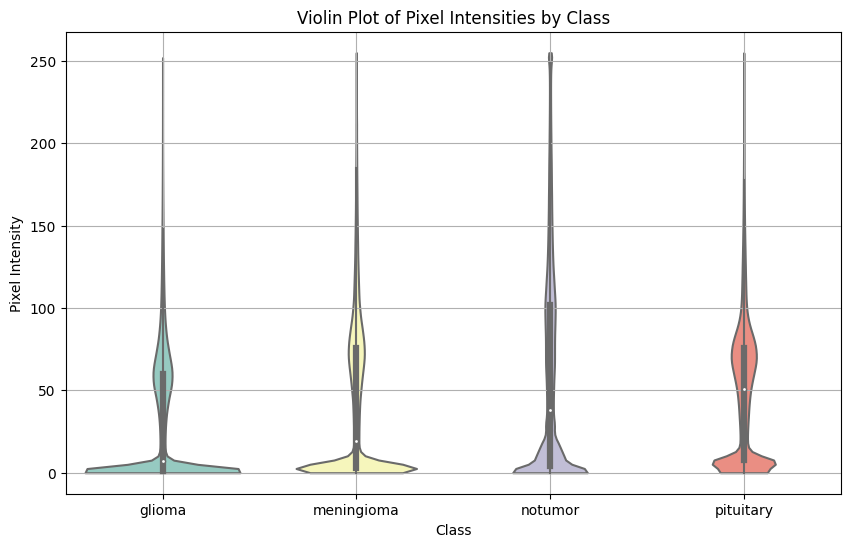

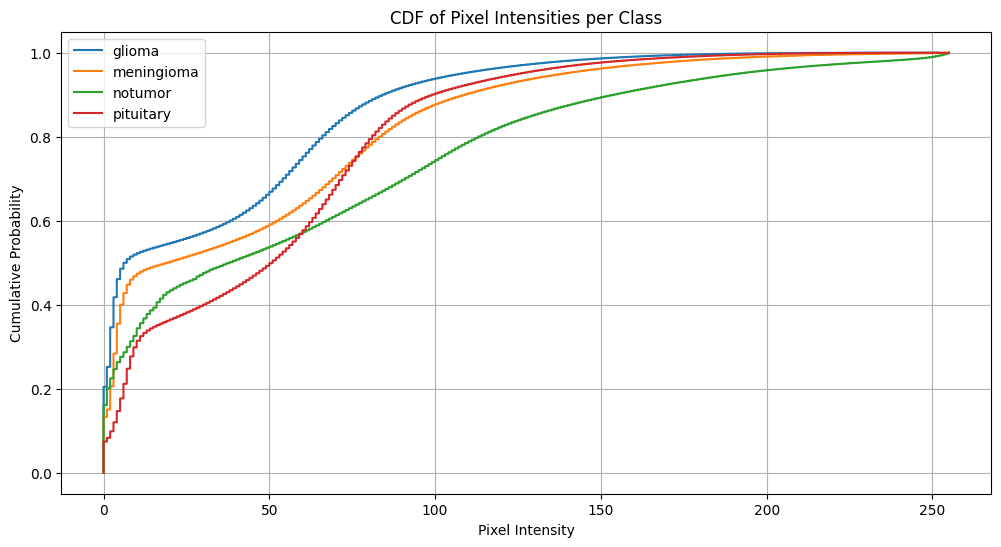

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define the path to the dataset
data_path = '/kaggle/input/brain-tumor-mri-dataset/Training/'

# Initialize dictionary to hold pixel values per class
class_pixel_values = {}

# Read pixel values class-wise (sorted folders and files)
# Memory not available for 256x246
for folder in sorted(os.listdir(data_path)):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        pixel_list = []
        for img_file in sorted(os.listdir(folder_path)):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    pixel_list.extend(img.flatten())
        class_pixel_values[folder] = np.array(pixel_list)

# Set consistent colors for each class
colors = sns.color_palette("tab10", len(class_pixel_values))

# Convert to DataFrame for seaborn plots
data, labels = [], []
for cls, pixels in class_pixel_values.items():
    data.extend(pixels)
    labels.extend([cls] * len(pixels))

df = pd.DataFrame({'Pixel Intensity': data, 'Class': labels})

# 1. Histogram
plt.figure(figsize=(12, 8))
for i, (cls, pixels) in enumerate(class_pixel_values.items()):
    plt.hist(pixels, bins=50, alpha=0.6, label=cls, color=colors[i], density=True)
plt.title('Histogram of Pixel Intensities per Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Pixel Intensity', data=df, palette='Set2')
plt.title('Boxplot of Pixel Intensities by Class')
plt.grid(True)
plt.show()

# 3. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Pixel Intensity', data=df, palette='Set3', cut=0)
plt.title('Violin Plot of Pixel Intensities by Class')
plt.grid(True)
plt.show()

# 4. CDF
plt.figure(figsize=(12, 6))
for i, (cls, pixels) in enumerate(class_pixel_values.items()):
    sorted_vals = np.sort(pixels)
    cdf = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    plt.plot(sorted_vals, cdf, label=cls, color=colors[i])
plt.title('CDF of Pixel Intensities per Class')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()
